In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics

In [2]:
results = pd.read_csv('../../Data/ResultData/wave_trend_results.csv')

In [3]:
results.head()

,symbol,indicator,start_date,end_date,ob_level,os_level,k,mean,std,skewness,kurtosis,entropy,n_total_partitions,n_partitions,clean_gains
0,ADA/USDT,wave_trend,2020-09-12 00:01:00,2020-09-19 00:00:00,53,-53,0.001,0.09428,0.002346,0.055612,-0.985233,9.217999,69,8,0.493738
1,ADA/USDT,wave_trend,2020-09-12 00:01:00,2020-09-19 00:00:00,53,-53,0.002,0.09428,0.002346,0.055612,-0.985233,9.217999,65,8,-0.173816
2,ADA/USDT,wave_trend,2020-09-12 00:01:00,2020-09-19 00:00:00,53,-53,0.003,0.09428,0.002346,0.055612,-0.985233,9.217999,61,9,-0.184818
3,ADA/USDT,wave_trend,2020-09-12 00:01:00,2020-09-19 00:00:00,53,-53,0.004,0.09428,0.002346,0.055612,-0.985233,9.217999,56,9,0.334299
4,ADA/USDT,wave_trend,2020-09-12 00:01:00,2020-09-19 00:00:00,53,-53,0.005,0.09428,0.002346,0.055612,-0.985233,9.217999,53,7,1.629595


In [4]:
for index, row in results.iterrows():
    print(row['start_date'] + ' - ' + row['end_date'])

2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 0

2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-28 00:01:00 - 2020-12-05 23:59:00
2020-11-28 00:01:00 - 2020-12-05 2

array([[<AxesSubplot:title={'center':'clean_gains'}>]], dtype=object)

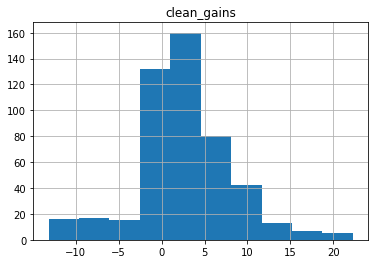

In [5]:
non_zero_results = results[results['clean_gains'] != 0]
non_zero_results.hist(column = 'clean_gains')

For each time frame:
* Build ML models (including hyperparameter tunning)
* Evaluate them
* Perform t-test and select model
* Store optimal values in dataset if the R^2 is greater than 0.8 and clean gains are positive

ML algorithms used:
* Linear Regression
* Ridge Regression
* Lasso Regression
* ElasticNet
* Stochastic Gradient Descent
* Decision Tree Regressor
* Linear Support Vector Regressor
* KNN Regressor
* Gradient Boosting regressor
> MLP Regressor excluded at the moment

# Generate train and test datasets

In [6]:
df = results[results['clean_gains'] != 0]

start_date = df.iloc[0]['start_date']
start_date = datetime.strptime('2020-12-06 00:00:00', '%Y-%m-%d %H:%M:%S')
end_date = start_date + timedelta(days = 7)
df = df[(df['start_date'] >= str(start_date)) & (df['end_date'] < str(end_date))]

df = df.sample(frac=1)
df = df.reset_index(drop=True)

X = df['k'].to_numpy()
y = df['clean_gains'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Linear regression

In [7]:
linear = LinearRegression()

linear.fit(X_train, y_train)

linear_y_pred = linear.predict(X_test)

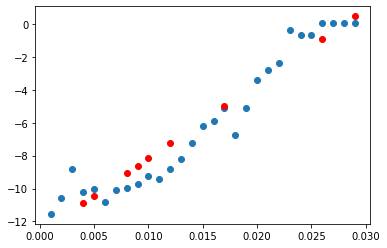

In [8]:
plt.scatter(X, y)
plt.scatter(X_test, linear_y_pred, color='r') 

In [9]:
linear_R2 = metrics.r2_score(y_test, linear_y_pred)
print(linear_R2)

0.9494641409151822


# Ridge regression

In [10]:
ridge = Ridge(alpha = 0.00001) # TODO: tunning

ridge.fit(X_train, y_train)

ridge_y_pred = ridge.predict(X_test)

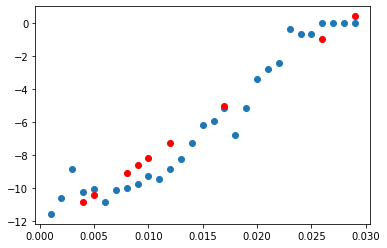

In [11]:
plt.scatter(X, y)
plt.scatter(X_test, ridge_y_pred, color='r')

In [12]:
ridge_R2 = metrics.r2_score(y_test, ridge_y_pred)
print(ridge_R2)

0.9485977318610034


# Lasso regression

In [13]:
lasso = Lasso(alpha = 0.00001) # TODO: tunning

lasso.fit(X_train, y_train)

lasso_y_pred = lasso.predict(X_test)

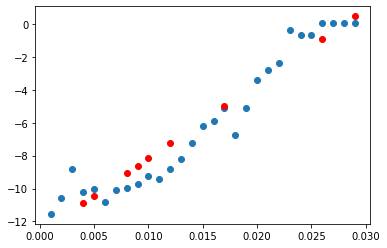

In [14]:
plt.scatter(X, y)
plt.scatter(X_test, lasso_y_pred, color='r')

In [15]:
lasso_R2 = metrics.r2_score(y_test, lasso_y_pred)
print(lasso_R2)

0.9494278858606567


# ElasticNet

In [16]:
elastic_net = ElasticNet(alpha=0.00001, l1_ratio=0.1)

elastic_net.fit(X_train, y_train)

elastic_net_y_pred = elastic_net.predict(X_test)

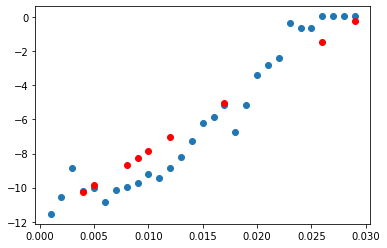

In [17]:
plt.scatter(X, y)
plt.scatter(X_test, elastic_net_y_pred, color='r')

In [18]:
elastic_net_R2 = metrics.r2_score(y_test, elastic_net_y_pred)
print(elastic_net_R2)

0.9231484073749258


# Stochastic Gradient Descent

In [19]:
sgd = SGDRegressor(max_iter=1000, tol=1e-3)

sgd.fit(X_train, y_train)

sgd_y_pred = sgd.predict(X_test)

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


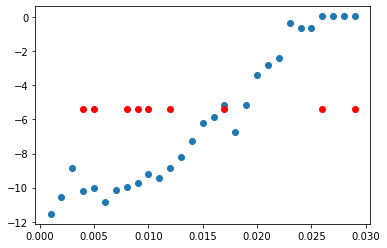

In [20]:
plt.scatter(X, y)
plt.scatter(X_test, sgd_y_pred, color='r')

In [21]:
sgd_R2 = metrics.r2_score(y_test, sgd_y_pred)
print(sgd_R2)

-0.1554637250405555


# DecisionTreeRegressor

In [22]:
dt = DecisionTreeRegressor(random_state=0)

dt.fit(X_train, y_train)

dt_y_pred = dt.predict(X_test)

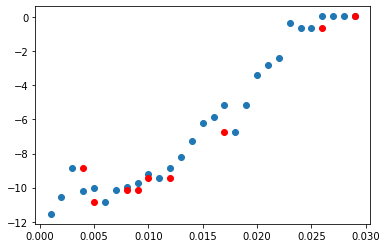

In [23]:
plt.scatter(X, y)
plt.scatter(X_test, dt_y_pred, color='r')

In [24]:
dt_R2 = metrics.r2_score(y_test, dt_y_pred)
print(dt_R2)

0.9569583925632502


# Linear Support Vector Regressor

In [25]:
svr = LinearSVR(random_state=0, tol=1e-5)

svr.fit(X_train, y_train)

svr_y_pred = svr.predict(X_test)

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


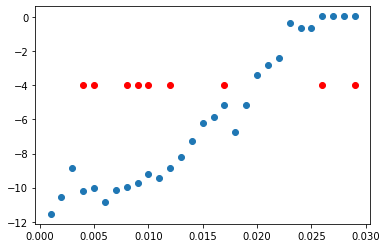

In [26]:
plt.scatter(X, y)
plt.scatter(X_test, svr_y_pred, color='r')

In [27]:
svr_R2 = metrics.r2_score(y_test, svr_y_pred)
print(svr_R2)

-0.5522792731261448


# KNN Regressor

In [39]:
knn = KNeighborsRegressor(n_neighbors=2)

knn.fit(X_train, y_train)

knn_y_pred = knn.predict(X_test)

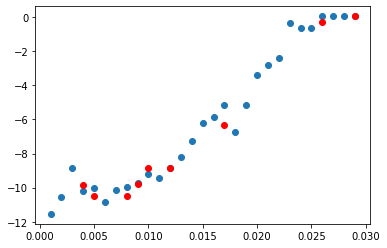

In [40]:
plt.scatter(X, y)
plt.scatter(X_test, knn_y_pred, color = 'r')

In [41]:
knn_R2 = metrics.r2_score(y_test, knn_y_pred)
print(knn_R2)

0.9840423607754922


# Gradient Boosting Regressor

In [31]:
gbr = GradientBoostingRegressor(random_state=0)

gbr.fit(X_train, y_train)

gbr_y_pred = gbr.predict(X_test)

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


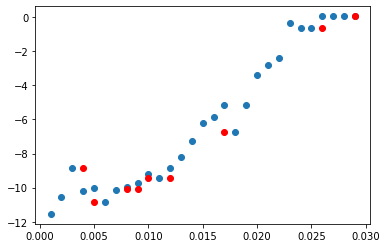

In [32]:
plt.scatter(X, y)
plt.scatter(X_test, gbr_y_pred, color = 'r')

In [33]:
gbr_R2 = metrics.r2_score(y_test, gbr_y_pred)
print(gbr_R2)

0.9574132329817824


# KNN hyperparameter tunning

In [34]:
param_grid = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]}

model = KNeighborsRegressor()

clf = HalvingGridSearchCV(model, param_grid, scoring='r2')
clf.fit(X_train, y_train)

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "E:\Anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 208, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "E:\Anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 683, 

HalvingGridSearchCV(estimator=KNeighborsRegressor(),
                    param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]},
                    refit=<function _refit_callable at 0x0000021372158BF8>,
                    scoring='r2')

In [35]:
print("Best parameters set found on development set:")
print(clf.best_params_)

Best parameters set found on development set:
{'n_neighbors': 9}


# Multivariate

In [58]:
df = results[results['clean_gains'] != 0]

start_date = df.iloc[0]['start_date']
start_date = datetime.strptime(start_date, '%Y-%m-%d %H:%M:%S')
end_date = start_date + timedelta(days = 7)
df = df[(df['start_date'] >= str(start_date)) & (df['end_date'] < str(end_date))]

df = df.sample(frac=1)
df = df.reset_index(drop=True)

X = df[['ob_level', 'os_level', 'k']].to_numpy()
y = df['clean_gains'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [59]:
gbr = GradientBoostingRegressor(random_state=0)

gbr.fit(X_train, y_train)

gbr_y_pred = gbr.predict(X_test)

In [65]:
k_test = []
for x in X_test:
    k_test.append(x[2])

In [66]:
k_test

[0.005, 0.011, 0.023, 0.009, 0.01, 0.026, 0.013, 0.02, 0.016]

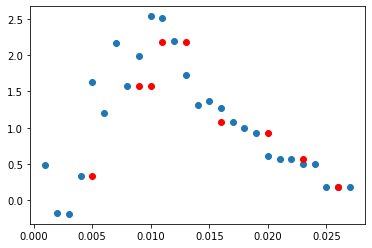

In [67]:
plt.scatter(df['k'], y)

plt.scatter(k_test, gbr_y_pred, color = 'r')